### MNIST
- 고등학생과 미국 인구조사국 지원들이 손으로 쓴 70,000개의 작은 숫자 이미지다.
- 각 이미지에는 어떤 숫자를 나타내는지 레이블 되어있다.
- 사이킷런 헬퍼 함수로 다운받을 수 있다.

In [48]:
# MNIST 다운로드
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
# 사이킷런에서 받은 MNIST는 pandas DataFrame 형태임. as_frame=False로 설정하면 numpy array 형태로 받을 수 있음
# parser='auto'로 설정하면 일반적으로 이미지 데이터는 넘파이로, 레이블은 문자열로 파싱됨
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### 사이킷런 데이터셋의 딕셔너리 구조
- DESCR: 데이터셋에 대한 설명을 확인할 수 있다.
- data: 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열
- target: 레이블 배열

In [49]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### MNIST의 Shape
- 70000개의 이미지
- X(data)는 70000개의 이미지에 대해 784개의 특성이 있음
- 784개의 특성은 28x28개의 픽셀을 뜻하고, 각 특성은 0(흰)부터 255(검)까지의 픽셀 강도를 나타냄
- 요 정보는 DESCR를 출력해보면 얻을 수 있음

### reshape, imshow
- 784개 특성이 1차원 배열로 되어있는데, reshape를 이용해 28x28 이차원 배열로 쉽게 바꿀 수 있다.
- matplotlib imshow를 통해 쉽게 그려볼 수 있다.

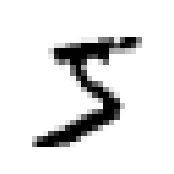

In [50]:
import matplotlib.pyplot as plt

digit = X[0].reshape(28, 28)

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(digit, cmap='binary')

### 레이블 확인

In [51]:
print(y[0])
# '5'가 출력: 레이블은 문자열로 되어있음
# 대부분 머신러닝 알고리즘은 숫자를 기대하므로 y를 정수로 변환
import numpy as np
y = y.astype(np.uint8)

5


# 훈련 세트, 테스트 세트 분리
- MNIST는 이미 앞쪽 60000개가 훈련 세트, 뒤쪽 10000개가 테스트 세트로 분리되어 있음
- 훈련 세트는 이미 잘 섞여 있어서 교차 검증 폴드가 비슷해짐(하나의 폴드라도 특정 숫자가 누락되면 안 됨)
- 특정 알고리즘은 훈련 샘플의 순서에 민감해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠짐

### 훈련 세트는 언제 섞어야 하는가?
- 주식이나 날씨 예보같은 시계열 데이터는 섞으면 안 됨
- SGD같은 경우는 샘플을 항상 섞어야 함. SGDClassifier와 SGDRegressor는 에포크마다 훈련 데이터를 다시 섞음

In [52]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 이진 분류
- 대상이 숫자 5인지 아닌지로 분류하는 이진 분류기 훈련해보자
- 먼저 타겟(label)을 True, False로 정해주자

In [57]:
y_train_5 = (y_train == 5) # 5는 True, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

print(y_train_5[:5])

[ True False False False False]


### SGDClassifier
- 확률적 경사 하강법(Stochastic Gradient Descent) 분류기
- 매우 큰 데이터셋을 효율적으로 처리함
- 한 번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문
- 그래서 온라인 학습에 잘 맞음
- 훈련할 때 무작위성을 사용하기 때문에 결과를 재현하고 싶다면 random_state를 지정해야 함

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [66]:
print(y_test_5[:20])
sgd_clf.predict(X_test[:20])

[False False False False False False False False  True False False False
 False False False  True False False False False]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

- 16번째 5는 잘 잡아내었는데, 9번째 5는 잡아내지 못했음
- 이 다음에 성능 측정을 해볼것임